# Yelp Rating Prediction

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. These reviews can either make or break whether or not a restaurant survives, and with the most recent global pandemic showing its true powers of shutting down businesses left or right, restaurants cannot afford to lose more business over lousy reviews.

To set up for success, we need to know the specific factors that play into a Yelp rating and will ultimately determines a business' success. With a dataset of different restaurant features and their Yelp ratings, we will investigate investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for a custom restaurant!

The project will use the following files:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

*Note: The project files are provided by CodeAcademy and edited in report form by Daniel Park*

## Load our Libraries and Data

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

To get a better understanding of the dataset we can use Pandas to explore the data in DataFrame form.

*Note: Importing that data could take take a while, but usually about 10 to 20 seconds depending on your computer*

In [2]:
businesses = pd.read_json('data/yelp_business.json', lines=True)
reviews = pd.read_json('data/yelp_review.json', lines=True)
users = pd.read_json('data/yelp_user.json', lines=True)
checkins = pd.read_json('data/yelp_checkin.json', lines=True)
tips = pd.read_json('data/yelp_tip.json', lines=True)
photos = pd.read_json('data/yelp_photo.json', lines=True)

In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

And inspecting the first five rows of each DataFrame, we can see how each dataframe is formatted and what information we will need from each to perform an analysis. However, all these dataframes are categorized by their `business_id`, which is in the format of a keycode, so we know what business each of the attributes are related to.

In [4]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [5]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [6]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [7]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [8]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [9]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


## Formatting and Cleaning the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to the Yelp rating. Given our six DataFrames, we need to perform 5 merges to combine all the data into one DataFrame for easier analysis.

In [10]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

In [11]:
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


Now with the data in one place, we have to clean our data, removing any null values as well as get rid of some columns so we can focus on the features that might have predictive power for determining an establishment's Yelp rating.

In a linear regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project with will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. 

In this case, we want to remove the following features from our data:

- `address`: it will be difficult to gauge whether or not the exact address of a business will have an affect on a business' Yelp activity.
- `attributes`: data is stored in a dictionary with too much variation with keys (some businesses have a 'RestaurantsAttire' attribute while others don't and have a 'AlcoholAllowed' attribute while the former establishment doesn't.)
- `business_id`: in a model, we do not need distinguishing keys if we want to include this data as data points
- `categories`: yelp ratings should not be biased by the type of establishment (food, service, hotel, etc.)
- `hours`: opening hours are not relevant
- `is_open`: not a good discrete factor
- All location attributes: such as `city`, `latitude`, `longitude`, `postal_code`, `state`, `time` should not be relevant when analyzing the quality of yelp reviews

In [12]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']

df.drop(features_to_remove, axis=1, inplace=True)

In [13]:
print(df.columns)

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi',
       'price_range', 'review_count', 'stars', 'take_reservations',
       'takes_credit_cards', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')


Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the linear regression model from running correctly. In this case, the columns `weekday_checkins`, `weekend_checkins`, `average_tip_length`, `number_tips`, `average_caption_length`, `number_pics` do have missing values:

In [14]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. For example, if there is a `NaN` value for `number_pics`, it means that the associated business did not have any pictures posted on its Yelp page. Thus we can replace all of our `NaN`s with `0`s.

In [15]:
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

Now we don't have any columns with missing data

In [16]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Exploratory Data Analysis

Now that our data is all together, we need to investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). 

In a linear regression model, we need to find the features with the best correlations. Fortunately, Pandas has the method `.corr()` that allows us to see the correlation coefficients for each pair of our different features. A correlation of `0` indicates that two features have no linear relationship while a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship.

We can first find our correlation matrix for the all the values in our cleaned data.

In [17]:
corr = df.corr()
corr

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


But to isolate our most important dependent variable `stars`, we can single out the variable and sort the variable correlations by the highest correlation.

In [18]:
# Get the correlation of the stars
stars_corr = corr[['stars']]

# Taking the absolute value for now to show the highest levels of correlation
stars_corr_abs = stars_corr.abs().unstack()
stars_corr_sorted = stars_corr_abs.sort_values(kind = "quicksort", ascending = False)
stars_corr_sorted

stars  stars                         1.000000
       average_review_sentiment      0.782187
       average_review_length         0.277081
       average_review_age            0.125645
       has_bike_parking              0.068084
       average_review_count          0.066572
       average_number_years_elite    0.064419
       average_tip_length            0.052899
       price_range                   0.052565
       number_cool_votes             0.043375
       alcohol?                      0.043332
       has_wifi                      0.039857
       average_days_on_yelp          0.038061
       takes_credit_cards            0.037748
       review_count                  0.032413
       average_number_fans           0.031141
       good_for_kids                 0.030382
       take_reservations             0.024486
       number_tips                   0.014038
       weekend_checkins              0.007863
       average_number_friends        0.007629
       weekday_checkins           

Getting the correlation values for each variable we see that `average_review_sentiment`, `average_review_length`, `average_review_age` have the highest degree of correlation to `stars` (with those variables the only ones that have a correlation in the tenths.) We also ignore `stars` because `stars` will, of course, correlate well with itself.

>In our data, the variable `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data.

To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating (as described in stars)

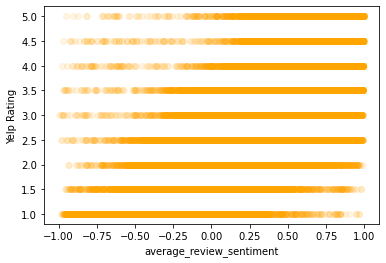

In [19]:
# Plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1, c= 'orange')
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()

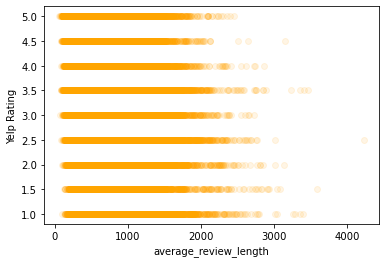

In [20]:
# Plot average_review_length against stars here
plt.scatter(df['average_review_length'],df['stars'],alpha=0.1, c= 'orange')
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()

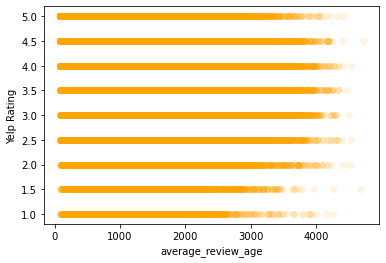

In [21]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'],df['stars'],alpha=0.1, c= 'orange')
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()

And just to see what a bad correlation looks like, we can graph our lowest correlation

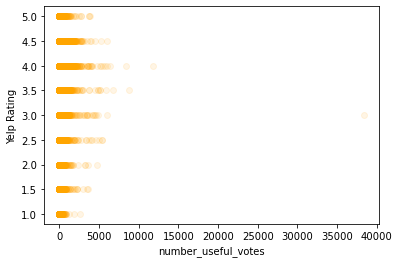

In [22]:
# plot number_useful_votes against stars here
plt.scatter(df['number_useful_votes'],df['stars'],alpha=0.1, c= 'orange')
plt.xlabel('number_useful_votes')
plt.ylabel('Yelp Rating')
plt.show()

While we see our latter three variable taper off towards the '0' end (meaning little correlation) for each yelp rating, we see `average_review_sentiment` correlate extremely well with a Yelp rating.

## Feature Selection

In order to put our data into a linear regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age` since we want to dig a little deeper than just `average_review_sentiment`. 

We first create a variable `ratings` as the variable we want all our features to correlate against.

In [47]:
ratings = df['stars']

Next, let's seperate our strongest feature, `average_review_sentiment` into its own model while we seperate `average_review_length` and `average_review_age` into another model.

In [48]:
sentiment_feature = df['average_review_sentiment']

In [49]:
review_length_age_features = df[['average_review_length','average_review_age']]

## Split the Data into Training and Testing Sets

Common in building any kind of machine learning model to evaluate how well our model performs, we need to split our data into training and testing sets.

We'll use scikit-learn's `train_test_split` function to split our data into testing and training sets from the dataframe and use linear regression to create a model from the sentiment as well as the review length and age features.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
# `average_review_sentiment`
sentiment_X_train, sentiment_X_test, sentiment_y_train, sentiment_y_test = train_test_split(sentiment_feature, ratings, test_size = 0.2, random_state = 1)

**Note**: Since we are only creating a model with a single variable in our sentiment_feature model, we will reshape the `average_review_sentiment` so we can fit it onto our linear regression model.

In [64]:
sentiment_X_train = np.array(sentiment_X_train).reshape(-1,1)
sentiment_X_test = np.array(sentiment_X_test).reshape(-1,1)

In [65]:
# 'average_review_length' and 'average_review_age'
review_length_age_X_train, review_length_age_X_test, review_length_age_y_train, review_length_age_y_test = train_test_split(review_length_age_features, ratings, test_size = 0.2, random_state = 1)

## Create and Train the Model

Now that our data is split into training and testing sets, we can create our linear regression models from scikit-learn's `linear_model` module. The `.fit()` method will fit our model to our training data and calculate the coefficients for our features.

In [66]:
# `average_review_sentiment`
sentiment_model = LinearRegression()
sentiment_model.fit(sentiment_X_train, sentiment_y_train)

LinearRegression()

In [69]:
# `average_review_length` and `average_review_age`
review_length_age_model = LinearRegression()
review_length_age_model.fit(review_length_age_X_train, review_length_age_y_train)

LinearRegression()

## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways.

### Coefficients of Determination

The first way will be by using the `.score()` method on both the training and testing data for our model. This method provides the coefficient of determination, the $R^2$ value, or how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data for our models.

$R^2$ values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data.

**Evaluating our `average_review_sentiment` model against training data**

In [79]:
sentiment_model.score(sentiment_X_train, sentiment_y_train)

0.6118980950438655

**Evaluating our `average_review_sentiment` model against testing data**

In [80]:
sentiment_model.score(sentiment_X_test, sentiment_y_test)

0.6114021046919492

**Evaluating our `average_review_length` and `average_review_age` models against training data**

In [81]:
review_length_age_model.score(review_length_age_X_train, review_length_age_y_train)

0.08250309566544889

**Evaluating our `average_review_length` and `average_review_age` models against testing data**

In [82]:
review_length_age_model.score(review_length_age_X_test, review_length_age_y_test)

0.08083081210060561

Comparing the different $R^2$ values, we see that the coefficients of determination for the `average_review_sentiment` model is much larger at about 0.61 compared to the `average_review_length` and `average_review_age` models at about 0.08 for both the training and testing data.

### Calculating the Predicted Yelp Rating using our Models

We can also calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings. Our model has a `.predict()` method which uses the model's coefficients to calculate the predicted Yelp rating.

For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. 

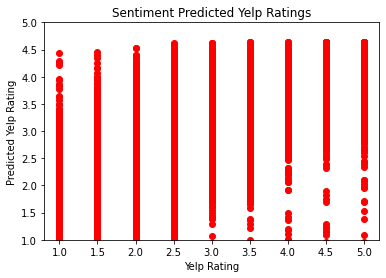

In [86]:
sentiment_y_predicted = sentiment_model.predict(sentiment_X_test)

plt.scatter(sentiment_y_test, sentiment_y_predicted,c="r")
plt.title("Sentiment Predicted Yelp Ratings")
plt.xlabel("Yelp Rating")
plt.ylabel("Predicted Yelp Rating")
plt.ylim(1,5)
plt.show()

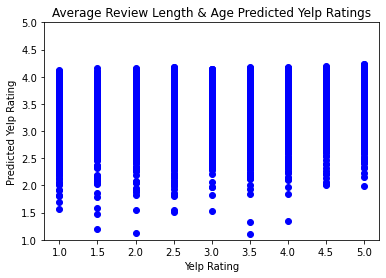

In [89]:
review_length_age_y_predicted = review_length_age_model.predict(review_length_age_X_test)

plt.scatter(review_length_age_y_test, review_length_age_y_predicted,c="b")
plt.title("Average Review Length & Age Predicted Yelp Ratings")
plt.xlabel("Yelp Rating")
plt.ylabel("Predicted Yelp Rating")
plt.ylim(1,5)
plt.show()

From analyzing our two models, there's a clear distinction between the accuracy of our models. Although not completely one to one, our `average_sentimental_value` model tends to have more points toward its intended yelp rating and a `y = x` relationship with the predicted yelp ratings. 

On the other hand, our `average_review_length` and `average_review_age` models do not seem to be a correlation between yelp rating and predicted yelp rating with the range of values for each yelp rating to be relatively similar. From this, we can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating.

## Define Different Subsets of Data

Although we have created models for our strongest variables, we should also take in the other variables in account as well to see if we can achieve a more accurate model.

We can seperated our features into two different types of variables

- `binary_features`: variables that have a boolean response range of 0 and 1.
- `numeric_features`: variables that have a nonboolean response range greater than 0 or 1.

We will also include our three variables we created models from (`average_sentimental_value`, `average_review_length`, `average_review_age`) in these feature subsets

In [90]:
# subset of all features that have a boolean response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [93]:
# subset of all features that vary on a greater, non-boolean range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [92]:
# combining these features all features
all_features = binary_features + numeric_features

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. 

In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. 

This function replicates the model building process above with our other models as well as the correlated scores and $R^2$ models.

In [125]:
"""
Creates and displays a predictive model of the features in the inputted `feature_list`

Input:
    `feature_list`: features chosen from the dataframe

Return:
    None
    
Output:
    Predictive Graphs of the models modelling all the features inputted
"""
def model_features(feature_list):
    
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    print('\n')
    
    # print the model features and their corresponding R^2 values, from most predictive to least predictive
    print('Features, Coefficients of Determination:', sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

We can then use this function on our different features lists.

**Binary Features Model**

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072


Features, Coefficients of Determination: [('has_bike_parking', 0.19003008208040764), ('alcohol?', -0.14549670708137835), ('has_wifi', -0.13187397577762172), ('good_for_kids', -0.08632485990337849), ('takes_credit_cards', 0.0717553649219558), ('take_reservations', 0.045265585304515694)]


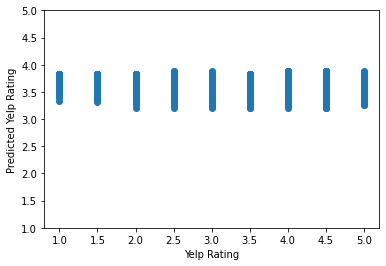

In [121]:
model_features(binary_features)

**Numeric Features Model**

Train Score: 0.6734992593766658
Test Score: 0.6713318798120158


Features, Coefficients of Determination: [('average_review_sentiment', 2.2721076642094897), ('price_range', -0.08046080962697907), ('average_number_years_elite', -0.0719036628805429), ('average_caption_length', -0.003347066007784876), ('number_pics', -0.0029565028128919263), ('number_tips', -0.0015953050789033118), ('number_cool_votes', 0.001146883922707117), ('average_number_fans', 0.0010510602097463942), ('average_review_length', -0.0005813655692093333), ('average_tip_length', -0.000532203206345806), ('number_useful_votes', -0.00023203784758736579), ('average_review_count', -0.00022431702895035695), ('average_review_age', -0.00016930608165062347), ('average_days_on_yelp', 0.0001287802587668042), ('weekday_checkins', 5.91858075447288e-05), ('weekend_checkins', -5.5181762069853035e-05), ('average_number_friends', 4.826992111579115e-05), ('review_count', -3.483483763759265e-05), ('number_funny_votes', -7.884395673254246e-0

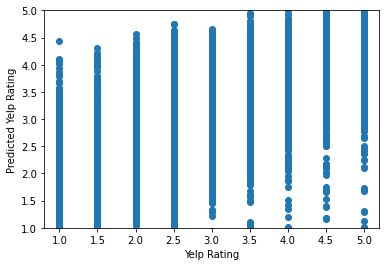

In [122]:
model_features(numeric_features)

**All Features**

Train Score: 0.6807828861895335
Test Score: 0.6782129045869247


Features, Coefficients of Determination: [('average_review_sentiment', 2.280845699662372), ('alcohol?', -0.149914985934756), ('has_wifi', -0.1215538262926395), ('good_for_kids', -0.11807814422008919), ('price_range', -0.06486730150042011), ('average_number_years_elite', -0.06278939713895318), ('has_bike_parking', 0.027296969912164074), ('takes_credit_cards', 0.02445183785365247), ('take_reservations', 0.014134559172973253), ('number_pics', -0.001313361230080694), ('average_number_fans', 0.001026798682265411), ('number_cool_votes', 0.0009723722734405931), ('number_tips', -0.0008546563320879271), ('average_caption_length', -0.0006472749798206005), ('average_review_length', -0.00058962579202727), ('average_tip_length', -0.0004205217503403316), ('number_useful_votes', -0.00027150641256149226), ('average_review_count', -0.00023398356902507196), ('average_review_age', -0.00015776544111326118), ('average_days_on_yelp', 0.0001232

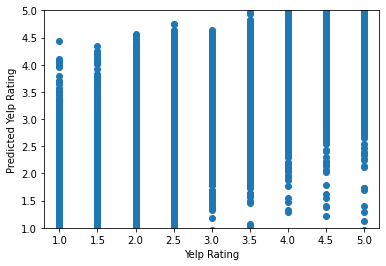

In [123]:
model_features(all_features)

Modelling the features, we see in our training/testing scores as well as our prediction graph, modelling all our features show the best correlations to accurately predict an establishment's Yelp rating based the different features in `all_features` compared to the actual rating received on Yelp.

## My Parent's Undisclosed Nail Salon

You've loaded the data, cleaned it, modeled it, and evaluated it. You're tired, but glowing with pride after all the hard work. You close your eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will your Yelp rating be? Let's use our model to make a prediction.

Our best model was the model using all features, so we'll work with this model again. In the cell below print `all_features` to get a reminder of what features we are working with.

Run the cell below to grab all the features and retrain our model on them.

In [39]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

To give you some perspective on the restaurants already out there, we have provided the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [40]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Based on your plans for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values. The first blank corresponds with the feature at `index=0` in the DataFrame above, `alcohol?`, and the last blank corresponds to the feature at ``index=24``, `weekend_checkins`. Make sure to enter either `0` or `1` for all binary features, and if you aren't sure of what value to put for a feature, select the mean from the DataFrame above. After you enter the values, run the prediction cell below to receive your Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [41]:
danielles_delicious_delicacies = np.array([_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_]).reshape(1,-1)

In [42]:
model.predict(danielles_delicious_delicacies)

ValueError: could not convert string to float: 'alcohol?'

## Next Steps

You have successfully built a linear regression model that predicts a restaurant's Yelp rating! As you have seen, it can be pretty hard to predict a rating like this even when we have a plethora of data. What other questions come to your mind when you see the data we have? What insights do you think could come from a different kind of analysis? Here are some ideas to ponder:

* Can we predict the cuisine of a restaurant based on the users that review it?
* What restaurants are similar to each other in ways besides cuisine?
* Are there different restaurant vibes, and what kind of restaurants fit these conceptions?
* How does social media status affect a restaurant's credibility and visibility?

As you progress further into the field of data science, you will be able to create models that address these questions and many more! But in the meantime, get back to working on that burgeoning restaurant business plan.